# HandWritten Digits Recognition

## Using MNIST Dataset

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
mnist

<module 'tensorflow_core.python.keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\DELL\\Anaconda3\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

## After Loding MNIST Data, Divide Into Train And Test DataSets

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

plt.imshow(x_train[0], cmap = plt.cm.binary)

<Figure size 640x480 with 1 Axes>

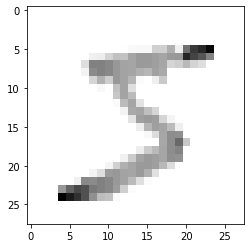

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

## Normalizing The Data

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])

5


## Resizing Image To Make It Suitable For Apply Convolution Operation

In [10]:
import numpy as np
img_size=28
x_trainr=np.array(x_train).reshape(-1,img_size, img_size,1)
x_testr=np.array(x_test).reshape(-1,img_size, img_size,1)
print("Training dimensions",x_trainr.shape)
print("Testing dimensions",x_testr.shape)k

Training dimensions (60000, 28, 28, 1)
Testing dimensions (10000, 28, 28, 1)


## Creating a Deep Neural Network

#### Traing on 60,000 samples of MNIST Hand Written Datasets

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [12]:
model=Sequential()

### First Convolution Layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### Second Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### Third Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### Fully Connected Layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

### Fully Connected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

### Last Fully Connected Layer 
model.add(Dense(10))
model.add(Activation("softmax"))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [14]:
print("Total Training Samples =",len(x_trainr))

Total Training Samples = 60000


In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [16]:
model.fit(x_trainr,y_train,epochs=5, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 87s 2ms/sample - loss: 0.3477 - accuracy: 0.8899 - val_loss: 0.1293 - val_accuracy: 0.9608
Epoch 2/5
42000/42000 [==============================] - 80s 2ms/sample - loss: 0.1102 - accuracy: 0.9669 - val_loss: 0.0915 - val_accuracy: 0.9716
Epoch 3/5
42000/42000 [==============================] - 84s 2ms/sample - loss: 0.0788 - accuracy: 0.9758 - val_loss: 0.0824 - val_accuracy: 0.9750
Epoch 4/5
42000/42000 [==============================] - 94s 2ms/sample - loss: 0.0638 - accuracy: 0.9801 - val_loss: 0.0720 - val_accuracy: 0.9776
Epoch 5/5
42000/42000 [==============================] - 92s 2ms/sample - loss: 0.0503 - accuracy: 0.9840 - val_loss: 0.0816 - val_accuracy: 0.9759


In [17]:
test_loss, test_acc = model.evaluate(x_testr,y_test)
print("Test Loss on 10,000 test samples",test_loss)
print("validation Accuracy on 10,000 test samples",test_acc)

10000/10000 [==============================] - 5s 504us/sample - loss: 0.0711 - accuracy: 0.9791TA: 0s - los
Test Loss on 10,000 test samples 0.07109194930158555
validation Accuracy on 10,000 test samples 0.9791


In [18]:
predictions=model.predict([x_testr])

In [19]:
predictions

array([[2.88565634e-08, 1.67001573e-07, 1.43763773e-05, ...,
        9.99974370e-01, 7.97102917e-09, 4.69329916e-06],
       [2.41576647e-03, 6.39852442e-06, 9.97345626e-01, ...,
        9.72890193e-05, 1.14890527e-05, 4.60225237e-05],
       [7.24764504e-07, 9.99788940e-01, 1.47049368e-05, ...,
        6.49815411e-05, 1.74849822e-06, 1.11543329e-06],
       ...,
       [6.74656198e-09, 8.77058592e-10, 1.25878103e-07, ...,
        5.49526760e-07, 2.31635681e-07, 3.82788221e-06],
       [1.04388855e-04, 5.59627811e-09, 6.52058958e-08, ...,
        3.01347853e-08, 1.76862275e-04, 5.26490403e-05],
       [4.30518470e-04, 5.18482590e-09, 7.31962573e-05, ...,
        1.35579779e-08, 1.48046556e-05, 6.47624474e-05]], dtype=float32)

In [20]:
print(np.argmax(predictions[0]))

7


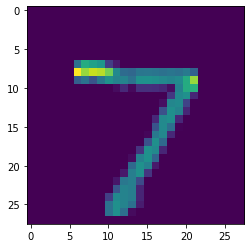

In [21]:
plt.imshow(x_test[0])

In [22]:
print(np.argmax(predictions[128]))

8


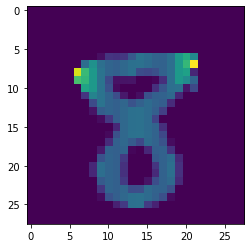

In [23]:
plt.imshow(x_test[128])

In [40]:
import cv2

In [77]:
img= cv2.imread('img.png')

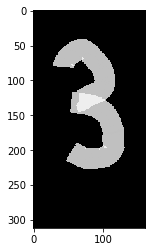

In [78]:
plt.imshow(img)

In [79]:
img.shape

(312, 161, 3)

In [80]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [81]:
gray.shape

(312, 161)

In [82]:
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

In [83]:
resized.shape

(28, 28)

In [84]:
new_img = tf.keras.utils.normalize(resized,axis=1)

In [85]:
new_img = np.array(new_img).reshape(-1,img_size,img_size,1)

In [86]:
new_img.shape

(1, 28, 28, 1)

In [87]:
predictions = model.predict(new_img)

In [88]:
print(np.argmax(predictions))

3


#### Now we can feed any Handwritten Digits to this and it would be able to predict correctly.